In [11]:
import pandas as pd
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
side_path = '公交线路.csv'
dot_path = '公交站点.csv'
#请用公交数据处理.py处理过的数据进行使用

In [12]:
side1 = pd.read_csv(side_path, encoding='gbk')
dot1 = pd.read_csv(dot_path, encoding='gbk')
side_b = pd.DataFrame(side1)
dot2 = pd.DataFrame(dot1)
side_b

,source,target,Weight
0,1号学生食堂,云艺公共教学楼,1
1,6号路,凤庆路口(双羊街),1
2,6号路,天文台(金马路),2
3,6号路,金马路中段,1
4,920医院,东陆桥(西园路),1
...,...,...,...
4082,龙马村(珥季路),龙马村东(珥季路),1
4083,龙马村东(珥季路),中航城(珥季路),1
4084,龙马村东(珥季路),龙马村(珥季路),1
4085,龙马社区居委会,中营(云秀路),4


In [13]:

dot = list(dot2.iloc[:, 0])

In [14]:
def degree_averge(G):
    degree =  nx.degree_histogram(G)
    i=0
    i1=0
    i2=0
    for s in degree:
        i1+=i*s
        i+=1
        i2+=s
    f=i1/i2
    return f



In [15]:
def attack(dot,side_b):
    G1=nx.Graph()

    nodes=[]
    for i in dot:
        a=rd.random()
        if p<=a:
            G1.add_node(i)

            nodes.append(i)
        else:
            side_b=side_b[~side_b['source'].isin([i])]
            side_b=side_b[~side_b['target'].isin([i])]
    side_q = list(side_b.iloc[:, 0])
    side_z = list(side_b.iloc[:, 1])
    for i in range(0,len(side_z)-1):
        G1.add_edge(side_q[i],side_z[i])
    return [G1,nodes]

In [16]:
a=[]
for i in range(0,100):
    p=i*0.01
    G=attack(dot,side_b)[0]
    nodes=attack(dot,side_b)[1]
    a.append(nx.global_efficiency(G))



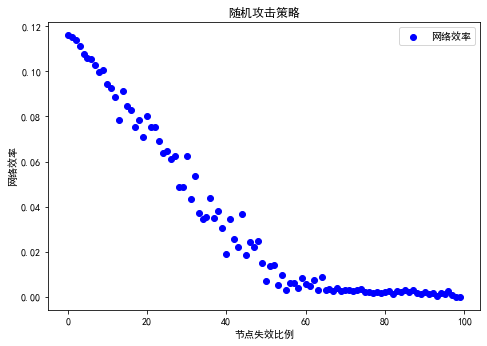

In [19]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
grades_range = range(0,100,1)
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号
ax.scatter(grades_range, a, color='b',label="网络效率")
ax.set_xlabel('节点失效比例')
ax.set_ylabel('网络效率')
ax.set_title('随机攻击策略')
#添加图例
plt.legend()
plt.show()

In [ ]:
len(grades_range)

